# Crop Production Analysis in Ethiopia

In [122]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [123]:
#define functions for plotting data.
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [124]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [125]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [143]:
df_yield = pd.read_csv('C:\\Users\\moga\\Desktop\\Files\\Crop_dataset\\yield.csv')
df_yield.shape

(56717, 12)

In [144]:
# Extracting yiled producion for Ethiopia using  column Area and code238
yield_et= (df_yield.loc[df_yield['Area'] == 'Ethiopia'])
yield_et

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
17965,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1993,1993,hg/ha,17364
17966,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1994,1994,hg/ha,11235
17967,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1995,1995,hg/ha,13590
17968,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1996,1996,hg/ha,16826
17969,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1997,1997,hg/ha,17381
...,...,...,...,...,...,...,...,...,...,...,...,...
18152,QC,Crops,238,Ethiopia,5419,Yield,137,Yams,2012,2012,hg/ha,270389
18153,QC,Crops,238,Ethiopia,5419,Yield,137,Yams,2013,2013,hg/ha,279805
18154,QC,Crops,238,Ethiopia,5419,Yield,137,Yams,2014,2014,hg/ha,296789
18155,QC,Crops,238,Ethiopia,5419,Yield,137,Yams,2015,2015,hg/ha,285412


Looking at the columns in the csv, we can rename Value to hg/ha_yield to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [145]:
# rename columns.
yield_et = yield_et.rename(index=str, columns={"Value": "hg/ha_yield"})
yield_et.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
17965,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1993,1993,hg/ha,17364
17966,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1994,1994,hg/ha,11235
17967,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1995,1995,hg/ha,13590
17968,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1996,1996,hg/ha,16826
17969,QC,Crops,238,Ethiopia,5419,Yield,56,Maize,1997,1997,hg/ha,17381


In [146]:
# drop unwanted columns.
yield_et = yield_et.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
yield_et.head()

,Area,Item,Year,hg/ha_yield
17965,Ethiopia,Maize,1993,17364
17966,Ethiopia,Maize,1994,11235
17967,Ethiopia,Maize,1995,13590
17968,Ethiopia,Maize,1996,16826
17969,Ethiopia,Maize,1997,17381


In [147]:
yield_et.describe()

,Year,hg/ha_yield
count,192.000000,192.000000
mean,2004.500000,49118.979167
std,6.940284,51286.163441
min,1993.000000,1754.000000
25%,1998.750000,15547.000000
50%,2004.500000,22499.500000
75%,2010.250000,78292.750000
max,2016.000000,296789.000000


In [160]:
yield_et.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 17965 to 18156
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         192 non-null    object
 1   Item         192 non-null    object
 2   Year         192 non-null    int64 
 3   hg/ha_yield  192 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.5+ KB


In [161]:
yield_et.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield'], dtype='object')

<AxesSubplot:xlabel='Year', ylabel='hg/ha_yield'>

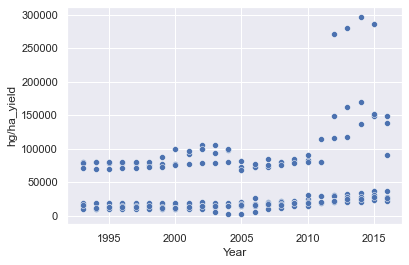

In [162]:
sns.scatterplot(x='Year', y='hg/ha_yield', data = yield_et)

<AxesSubplot:xlabel='Year'>

<Figure size 3600x1800 with 0 Axes>

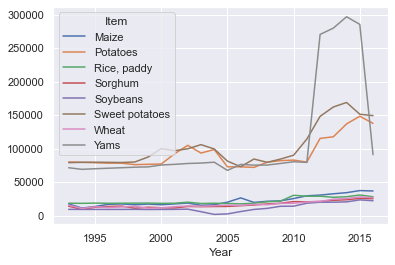

In [175]:
%matplotlib inline
plt.figure(figsize=(30,25))
sns.set()
table = pd.pivot_table(yield_et, values = 'hg/ha_yield', index=['Year'],
                    columns=['Item'], aggfunc=np.sum)
table.plot()

Text(0, 0.5, 'yield per year')

<Figure size 2160x1800 with 0 Axes>

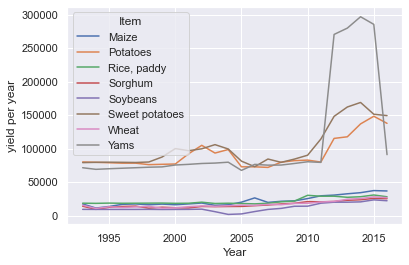

In [180]:
%matplotlib inline
plt.figure(figsize=(30,25))
sns.set()
yield_et.pivot_table('hg/ha_yield', index=['Year'],
                    columns=['Item'], aggfunc=np.sum).plot()
plt.ylabel('yield per year')

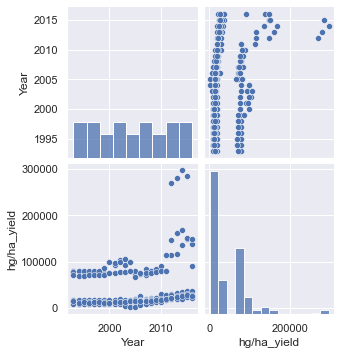

In [183]:
sns.pairplot(yield_et)

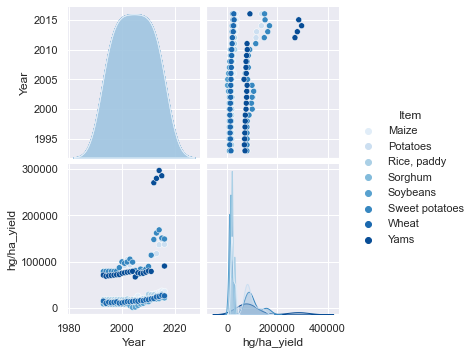

In [184]:
# use hue to categorize base on categorical vriable  sex for example
sns.pairplot(yield_et,hue='Item', palette='Blues')

**Data Aggregation**
Statistical aggregations take advantage of the statistical properties of the data to extract valuable insights. As a result, statistical aggregations produce a compressed description of the data, also known as summary statistics. Summary statistics usually contain information obtained from four different measures:

- Measures of Central Tendency – e.g. median, mean, mode, etc.

- Measures of Dispersion – e.g. variance, standard deviation, etc.

- Measures of Shape – e.g. kurtosis, skewness, etc.

- Measures of Dependence (if more than one variable is measured) – e.g. covariance, correlation, etc.

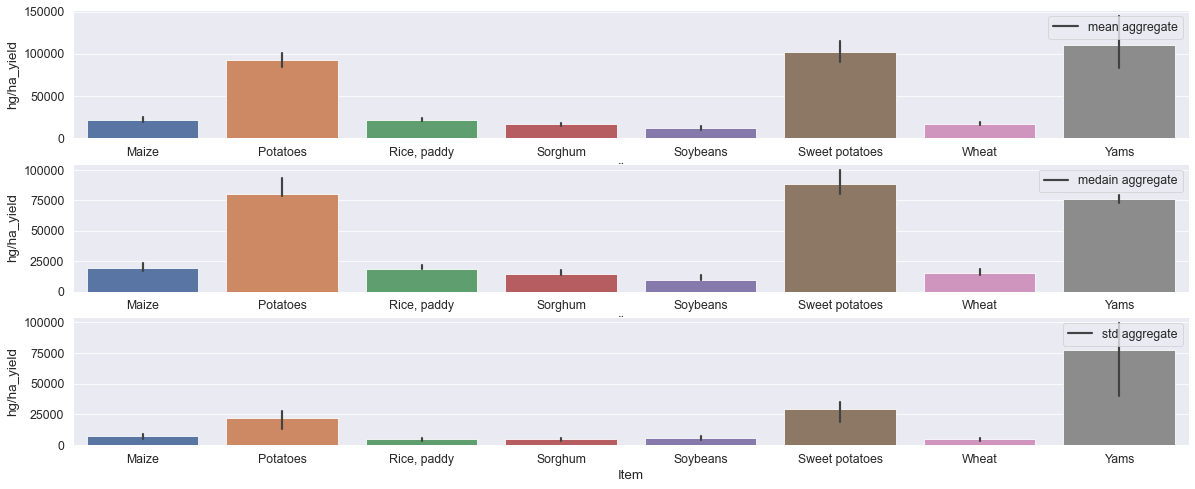

In [190]:
#aggregation of the data is based on the various momnets and respective variance 
plt.figure(figsize=(20,8))
sns.set_context('paper',font_scale=1.4)
plt.subplot(3,1,1)
sns.barplot(x='Item',y='hg/ha_yield', data=yield_et)
plt.legend(['mean aggregate'],loc=1)
plt.subplot(3,1,2)
sns.barplot(x='Item',y='hg/ha_yield', data=yield_et, estimator =np.median)
plt.legend(['medain aggregate'],loc=1)
plt.subplot(3,1,3)
sns.barplot(x='Item',y='hg/ha_yield', data=yield_et, estimator =np.std)
plt.legend(['std aggregate'],loc=1)

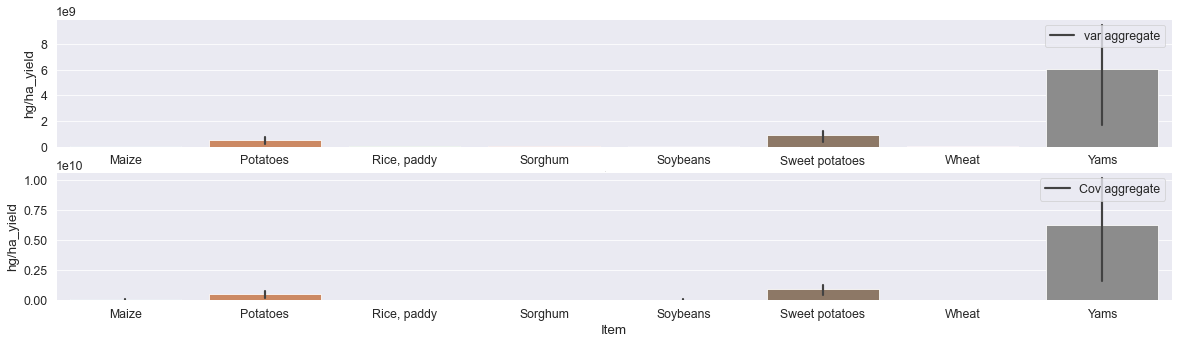

In [191]:
plt.figure(figsize=(20,8))
sns.set_context('paper',font_scale=1.4)
plt.subplot(3,1,1)
sns.barplot(x='Item',y='hg/ha_yield', data=yield_et, estimator =np.var)
plt.legend(['var aggregate'],loc=1)
plt.subplot(3,1,2)
sns.barplot(x='Item',y='hg/ha_yield', data=yield_et, estimator =np.cov)
plt.legend(['Cov aggregate'],loc=1)

**error bar**

The `length of an Error Bar helps reveal the uncertainty of a data point`: a short Error Bar shows that values are concentrated, signalling that the plotted average value is more likely, while a long Error Bar would indicate that the values are more spread out and less reliable. In this case yield rate from potaoes, sweetpotatos and Yams relatelvely experianced larger error to all momnets compared to other crops. 


`Covariance` indicates the direction of the linear relationship between two variables. In simple terms, given two random variables,

- if the greater values of one variable mainly correspond to the greater values of the other variable, and if the same behavior is replicated for lesser values, then the covariance is positive (> 0).

- In the opposite case, when greater values of one variable mainly correspond to lesser values of the other variable, the covariance is negative (< 0).

- If the random variables are independent from each other, the covariance is 0.
  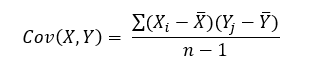

`Correlation` is a function of the covariance, and measures both the strength and the direction of the linear relationship between two variables. Essentially, it is a normalized version of the covariance, whose magnitude is bounded in the range of -1 (negative correlation) to +1 (positive correlation), also known as Pearson’s correlation coefficient. A correlation coefficient of 0 indicates absence of correlation.
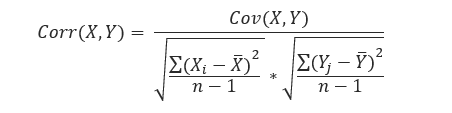

`Measures of Central Tendency` on the other hand includes the following

- **Mode** is the most frequent value

- **Median** is the middle value in an ordered set of values

- **Mean** is the sum of all values divided by the total number of values


Choosing one measure or the other has both advantages and disadvantages. One problem with the mode is that it is not unique, so it may be misleading when we have two or more values that share the highest frequency. One problem with the mean is that it is susceptible to the influence of outliers since it includes all data in the calculation. The median is less affected by outliers and skewed data, but it does not include each observation and hence does not use all information available. Moreover, unlike the mean, the median is not suited to further mathematical calculation and hence is not used in many statistical tests.

The other important statistical agregatsion known as `measures of dispersion` and most-widely used are the **variance**, and **standard deviation (SD)**

An SD error bar is usually a T-shaped line, which represents variability of data and is used on graphs to indicate the error around a reported measurement. Smaller error bars as as experianced in `Wheat, Rice,Paddy, Soybeans, sorghuhm, maize` indicate that the data is crumpled around  the respective mean.

# Climate Data : Rainfall

The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.

Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

In [192]:
df_rain = pd.read_csv('C:\\Users\\moga\\Desktop\\Files\\Crop_dataset\\rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [193]:
df_rain.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [194]:
# Extracting yiled producion for Ethiopia using  column Area and code238
rain_et= (df_rain.loc[df_rain[' Area'] == 'Ethiopia'])
rain_et.head()

,Area,Year,average_rain_fall_mm_per_year
1984,Ethiopia,1985,848
1985,Ethiopia,1986,848
1986,Ethiopia,1987,848
1987,Ethiopia,1989,848
1988,Ethiopia,1990,848


In [195]:
rain_et.tail()

,Area,Year,average_rain_fall_mm_per_year
2010,Ethiopia,2013,848
2011,Ethiopia,2014,848
2012,Ethiopia,2015,848
2013,Ethiopia,2016,848
2014,Ethiopia,2017,848


In [196]:
rain_et = rain_et.rename(index=str, columns={" Area": 'Area'})
#Checking for the datatypes

rain_et.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1984 to 2014
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           31 non-null     object
 1   Year                           31 non-null     int64 
 2   average_rain_fall_mm_per_year  31 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [197]:
#convert average_rain_fall_mm_per_year from object to float

rain_et['average_rain_fall_mm_per_year'] = pd.to_numeric(rain_et['average_rain_fall_mm_per_year'],errors = 'coerce')
rain_et.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1984 to 2014
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           31 non-null     object
 1   Year                           31 non-null     int64 
 2   average_rain_fall_mm_per_year  31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [198]:
rain_et = rain_et.dropna()
rain_et.describe()

,Year,average_rain_fall_mm_per_year
count,31.000000,31.0
mean,2001.354839,848.0
std,9.686927,0.0
min,1985.000000,848.0
25%,1993.500000,848.0
50%,2001.000000,848.0
75%,2009.500000,848.0
max,2017.000000,848.0


In [199]:
#The rainfall dataframe begins at 1985 and ends at 2016.

#Merge Yield Dataframe with rain Dataframe by year and area columns

yield_df = pd.merge(yield_et,rain_et, on=['Year','Area'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Ethiopia,Maize,1993,17364,848
1,Ethiopia,Potatoes,1993,80046,848
2,Ethiopia,"Rice, paddy",1993,18519,848
3,Ethiopia,Sorghum,1993,14018,848
4,Ethiopia,Soybeans,1993,9302,848


We can see that now the years start from the first yield dataframe the starting year was 1961, now it's 1985 because that's when the rainfall data begins.

In [200]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,184.000000,184.000000,184.0
mean,2004.565217,49384.527174,848.0
std,7.083120,51736.490500,0.0
min,1993.000000,1754.000000,848.0
25%,1998.000000,16053.250000,848.0
50%,2005.000000,23144.500000,848.0
75%,2011.000000,78261.000000,848.0
max,2016.000000,296789.000000,848.0


**Pesticides Data**:

Pesticides used for each item and country was also collected from FAO database

In [201]:
df_pes = pd.read_csv('C:\\Users\\moga\\Desktop\\Files\Crop_dataset\\pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [202]:
df_pes_et = (df_pes.loc[df_pes['Area'] == 'Ethiopia'])
df_pes_et.head()

,Domain,Area,Element,Item,Year,Unit,Value
1361,Pesticides Use,Ethiopia,Use,Pesticides (total),1993,tonnes of active ingredients,242.0
1362,Pesticides Use,Ethiopia,Use,Pesticides (total),1994,tonnes of active ingredients,242.0
1363,Pesticides Use,Ethiopia,Use,Pesticides (total),1995,tonnes of active ingredients,242.0
1364,Pesticides Use,Ethiopia,Use,Pesticides (total),1996,tonnes of active ingredients,383.0
1365,Pesticides Use,Ethiopia,Use,Pesticides (total),1997,tonnes of active ingredients,383.0


In [203]:
df_pes_et = df_pes_et.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes_et = df_pes_et.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes_et.head()

,Area,Year,pesticides_tonnes
1361,Ethiopia,1993,242.0
1362,Ethiopia,1994,242.0
1363,Ethiopia,1995,242.0
1364,Ethiopia,1996,383.0
1365,Ethiopia,1997,383.0


In [204]:
df_pes_et.describe()

,Year,pesticides_tonnes
count,24.000000,24.000000
mean,2004.500000,2004.572917
std,7.071068,1641.046259
min,1993.000000,242.000000
25%,1998.750000,465.125000
50%,2004.500000,1304.365000
75%,2010.250000,4128.100000
max,2016.000000,4128.100000


In [205]:
df_pes_et.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1361 to 1384
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               24 non-null     object 
 1   Year               24 non-null     int64  
 2   pesticides_tonnes  24 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 768.0+ bytes


**Merge Pesticides dataframe with yield dataframe**

In [206]:
yield_df = pd.merge(yield_df, df_pes_et, on=['Year','Area'])
yield_df.shape

(184, 6)

In [207]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Ethiopia,Maize,1993,17364,848,242.0
1,Ethiopia,Potatoes,1993,80046,848,242.0
2,Ethiopia,"Rice, paddy",1993,18519,848,242.0
3,Ethiopia,Sorghum,1993,14018,848,242.0
4,Ethiopia,Soybeans,1993,9302,848,242.0


In [208]:
yield_df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes'],
      dtype='object')

**Average Temprature**:

Average Temprature for each country was colleced from World Bank Data.

In [209]:
avg_temp=  pd.read_csv('C:\\Users\\moga\\Desktop\\Files\\Crop_dataset\\annual_et.csv')
avg_temp.head()

,Category,Annual Mean,5-yr smooth
0,1901,22.95,22.95
1,1902,22.88,22.90
2,1903,22.95,22.86
3,1904,22.71,22.82
4,1905,22.81,22.78


In [210]:
avg_temp.columns

Index(['Category', ' Annual Mean', '5-yr smooth'], dtype='object')

In [211]:
avg_temp = avg_temp.rename(index=str, columns={'Category':'Year', ' Annual Mean':'Area'})
avg_temp.head()

,Year,Area,5-yr smooth
0,1901,22.95,22.95
1,1902,22.88,22.90
2,1903,22.95,22.86
3,1904,22.71,22.82
4,1905,22.81,22.78


In [212]:
avg_temp["Area"] = 'Ethiopia'
avg_temp

,Year,Area,5-yr smooth
0,1901,Ethiopia,22.95
1,1902,Ethiopia,22.90
2,1903,Ethiopia,22.86
3,1904,Ethiopia,22.82
4,1905,Ethiopia,22.78
...,...,...,...
116,2017,Ethiopia,23.64
117,2018,Ethiopia,23.56
118,2019,Ethiopia,23.47
119,2020,Ethiopia,23.36


So average temprature starts from 1880 and ends at 2016.

In [213]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,5-yr smooth
0,Ethiopia,Maize,1993,17364,848,242.0,22.94
1,Ethiopia,Potatoes,1993,80046,848,242.0,22.94
2,Ethiopia,"Rice, paddy",1993,18519,848,242.0,22.94
3,Ethiopia,Sorghum,1993,14018,848,242.0,22.94
4,Ethiopia,Soybeans,1993,9302,848,242.0,22.94


In [214]:
yield_df.shape

(184, 7)

In [215]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,5-yr smooth
count,184.000000,184.000000,184.0,184.000000,184.000000
mean,2004.565217,49384.527174,848.0,2047.582609,23.386522
std,7.083120,51736.490500,0.0,1631.903871,0.245325
min,1993.000000,1754.000000,848.0,242.000000,22.940000
25%,1998.000000,16053.250000,848.0,383.000000,23.160000
50%,2005.000000,23144.500000,848.0,1400.700000,23.460000
75%,2011.000000,78261.000000,848.0,4128.100000,23.590000
max,2016.000000,296789.000000,848.0,4128.100000,23.710000


In [216]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
5-yr smooth                      0
dtype: int64

## Accessing Data on the DataHub

- To get Data Package into your Python environment, run following code:

- For Python, first install the `datapackage` library (all the datasets on DataHub are Data Packages):

In [217]:
#!pip install datapackage

In [218]:
from datapackage import Package

package = Package('https://datahub.io/core/global-temp/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'annual_csv', 'monthly_csv', 'annual_json', 'monthly_json', 'global-temp_zip', 'monthly_csv_preview', 'annual', 'monthly']
[['GCAG', 2016, Decimal('0.9363')], ['GISTEMP', 2016, Decimal('0.99')], ['GCAG', 2015, Decimal('0.8998')], ['GISTEMP', 2015, Decimal('0.87')], ['GCAG', 2014, Decimal('0.7408')], ['GISTEMP', 2014, Decimal('0.74')], ['GCAG', 2013, Decimal('0.6679')], ['GISTEMP', 2013, Decimal('0.65')], ['GCAG', 2012, Decimal('0.6240')], ['GISTEMP', 2012, Decimal('0.63')], ['GCAG', 2011, Decimal('0.5788')], ['GISTEMP', 2011, Decimal('0.6')], ['GCAG', 2010, Decimal('0.7014')], ['GISTEMP', 2010, Decimal('0.71')], ['GCAG', 2009, Decimal('0.6367')], ['GISTEMP', 2009, Decimal('0.64')], ['GCAG', 2008, Decimal('0.5419')], ['GISTEMP', 2008, Decimal('0.54')], ['GCAG', 2007, Decimal('0.6100')], ['GISTEMP', 2007, Decimal('0.66')], ['GCAG', 2006, Decimal('0.6125')], ['GISTEMP', 2006, Decimal('0.63')], ['GCAG', 2005, Decimal('0.6585')], ['GISTEMP', 2005, Decimal('0.69')], ['G

**Data Exploration**

yield_df is the final obtained dataframe;

In [219]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,5-yr smooth
Item,,,,,,
Maize,23,23,23,23,23,23
Potatoes,23,23,23,23,23,23
"Rice, paddy",23,23,23,23,23,23
Sorghum,23,23,23,23,23,23
Soybeans,23,23,23,23,23,23
Sweet potatoes,23,23,23,23,23,23
Wheat,23,23,23,23,23,23
Yams,23,23,23,23,23,23


It can be noticed the high variance in the values for each columns, later on I'll account for that will scaling.

In [220]:
yield_df['Area'].nunique()

1

The dataframe has 1 Country, ordering these by 10 the highest yield production:

In [221]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
Ethiopia    9086753
Name: hg/ha_yield, dtype: int64

In [222]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(50)

Item            Area    
Yams            Ethiopia    2562472
Sweet potatoes  Ethiopia    2346758
Potatoes        Ethiopia    2117864
Maize           Ethiopia     514107
Rice, paddy     Ethiopia     503335
Wheat           Ethiopia     389542
Sorghum         Ethiopia     377226
Soybeans        Ethiopia     275449
Name: hg/ha_yield, dtype: int64

Ethiopia  is the highest for production of Maize and wheat. 
The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [223]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\moga\AppData\Local\Temp\ipykernel_12812\4006580737.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


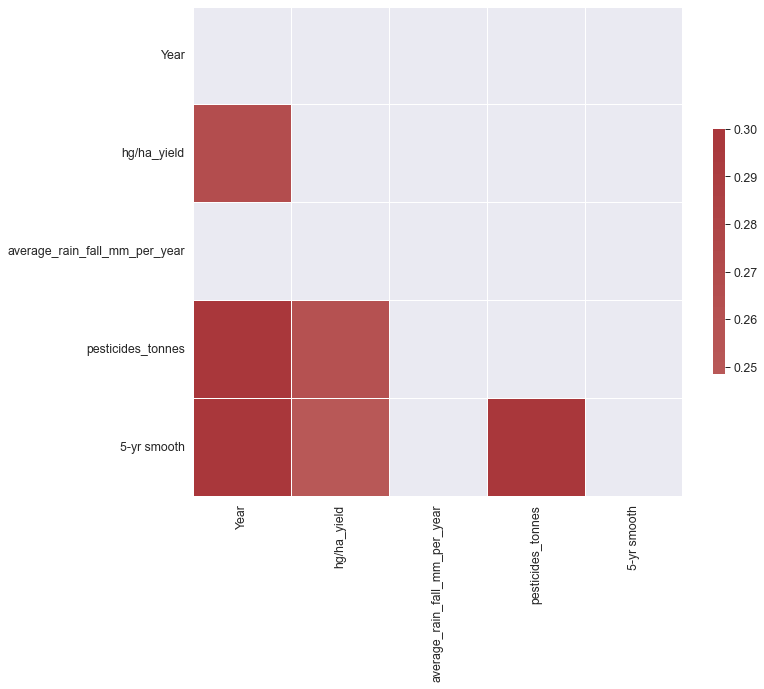

In [224]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<AxesSubplot:xlabel='Year', ylabel='hg/ha_yield'>

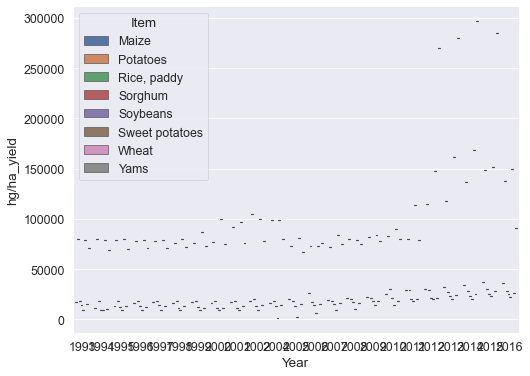

In [230]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale =1.4)
sns.violinplot(x='Year',y='hg/ha_yield', data=yield_df, hue='Item')

<AxesSubplot:>

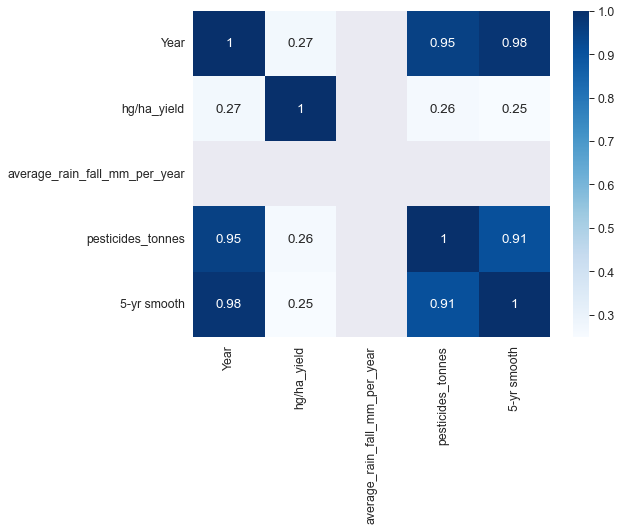

In [229]:
#option 2: using heatmap
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale =1.4)
yield_mx= yield_df.corr()
sns.heatmap(yield_mx,annot =True, cmap='Blues')

In [240]:
yield_df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', '5-yr smooth'],
      dtype='object')

<Figure size 576x432 with 0 Axes>

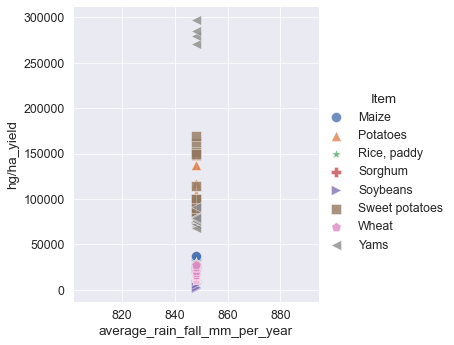

In [252]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='average_rain_fall_mm_per_year',y='hg/ha_yield', hue='Item',data=yield_df,markers=['o','^','*','P','>','s','p','<'],
          scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})

<Figure size 576x432 with 0 Axes>

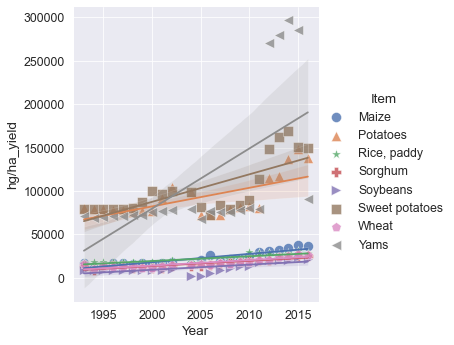

In [257]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='Year',y='hg/ha_yield', hue='Item',data=yield_df,markers=['o','^','*','P','>','s','p','<'],
          scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})

<Figure size 576x432 with 0 Axes>

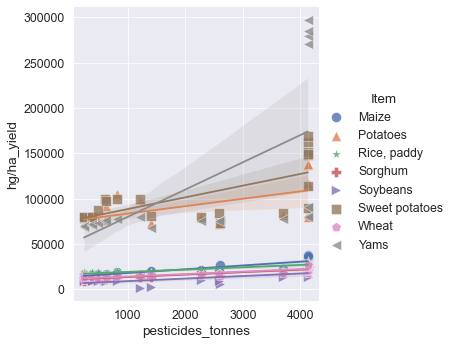

In [258]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='pesticides_tonnes',y='hg/ha_yield', hue='Item',data=yield_df,markers=['o','^','*','P','>','s','p','<'],
          scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})

<Figure size 576x432 with 0 Axes>

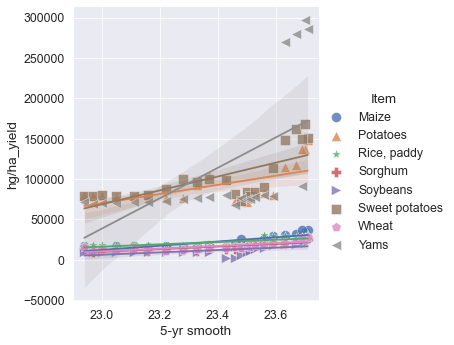

In [259]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='5-yr smooth',y='hg/ha_yield', hue='Item',data=yield_df,markers=['o','^','*','P','>','s','p','<'],
          scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'})